<a href="https://colab.research.google.com/github/gabrielkirsten/keras_mnist_tutorial/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação do tensorflow

In [0]:
import tensorflow as tf

## Importação do Keras

In [0]:
import keras

Using TensorFlow backend.


## Importar e exibir um exemplo do dataset MNIST

X train: (60000, 28, 28)
y train: (60000,)
y test: (10000, 28, 28)
y test: (10000,)


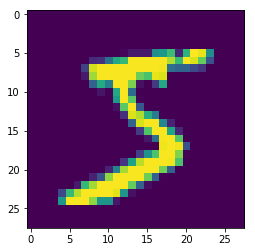

In [0]:
from matplotlib import pyplot as plt # Importa a lib do matplotlib
from keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

plt.imshow(X_train[0])

print("X train:", X_train.shape)
print("y train:", y_train.shape)
print("y test:", X_test.shape)
print("y test:", y_test.shape)

## Criando o modelo

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

W0713 20:34:30.108027 140036347729792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 20:34:30.172415 140036347729792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 20:34:30.205698 140036347729792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



## Compilando o modelo

In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

W0713 20:36:00.862555 140036347729792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 20:36:00.899941 140036347729792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



## Treinando a rede

In [0]:
model.fit(X_train, y_train, epochs=15)

W0713 20:37:10.025086 140036347729792 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0713 20:37:10.058197 140036347729792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/15
60000/60000 [==============================] - 8s 142us/step - loss: 9.3139 - acc: 0.4206
Epoch 2/15
60000/60000 [==============================] - 8s 127us/step - loss: 7.5196 - acc: 0.5326
Epoch 3/15
60000/60000 [==============================] - 8s 129us/step - loss: 7.3568 - acc: 0.5428
Epoch 4/15
60000/60000 [==============================] - 8s 127us/step - loss: 7.0263 - acc: 0.5636
Epoch 5/15
60000/60000 [==============================] - 8s 127us/step - loss: 6.0605 - acc: 0.6234
Epoch 6/15
60000/60000 [==============================] - 8s 126us/step - loss: 5.6085 - acc: 0.6514
Epoch 7/15
60000/60000 [==============================] - 7s 122us/step - loss: 5.4835 - acc: 0.6595
Epoch 8/15
60000/60000 [==============================] - 7s 122us/step - loss: 5.4525 - acc: 0.6614
Epoch 9/15
60000/60000 [==============================] - 7s 121us/step - loss: 5.5299 - acc: 0.6566
Epoch 10/15
60000/60000 [==============================] - 7s 122us/step - loss: 5.4029 - a

## Avaliando o modelo

In [0]:
import numpy as np

class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [0]:
predictions = model.predict(X_test) # realiza as predições no conjunto de teste

In [0]:
# Funções para plotar os resultados

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

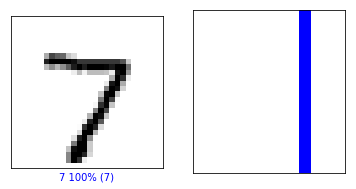

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

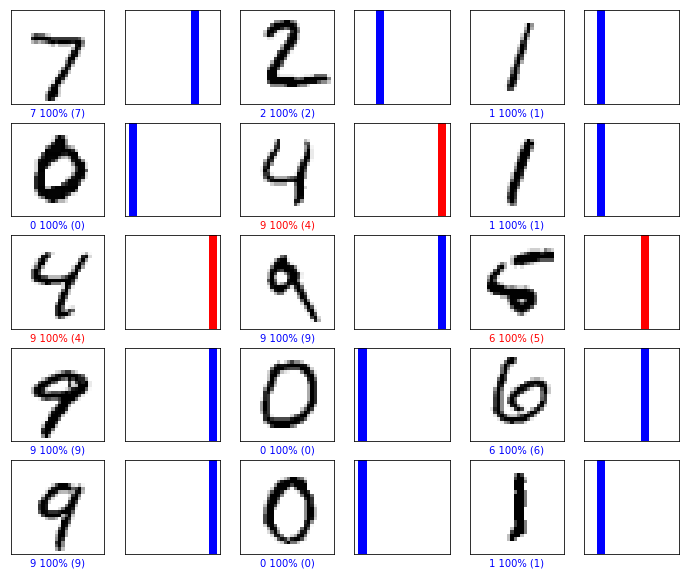

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()